In [107]:
import pandas as pd
import datetime

df = pd.read_csv("instagram_4.csv", encoding='utf-8')
df["timestamp"] = pd.to_datetime(1000000000*df["node.taken_at_timestamp"])
march_df = df[df["timestamp"].apply(lambda d: d.month) ==3]

In [108]:
import re 

l = df["node.edge_media_to_caption.edges"].apply(lambda s: re.findall(r"@(\w+)", s))
l = l[l.apply(lambda ll: len(ll)) > 0]

march_l = march_df["node.edge_media_to_caption.edges"].apply(lambda s: re.findall(r"@(\w+)", s))
march_l = march_l[march_l.apply(lambda ll: len(ll)) > 0]

In [110]:
print len(set(list(df["username"])))
print len(set(list(march_df["username"])))

8663
2652


In [111]:
from operator import add
print len(set(reduce(add, list(l))))
print len(set(reduce(add, list(march_l))))

2254
908


In [112]:
list_edges = []
list_edges_march = []
for list_cite, user in [(a,b) for a,b in zip(l, list(df["username"]))]:
    for citation in list_cite:
        list_edges.append((user, citation))
        
for list_cite, user in [(a,b) for a,b in zip(march_l, list(march_df["username"]))]:
    for citation in list_cite:
        list_edges_march.append((user, citation))

In [6]:
import networkx as nx

G=nx.Graph()
G.add_edges_from(list_edges)


In [116]:
import numpy as np

def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

def test(G_prime, fig=[10,10]):
    # to install networkx 2.0 compatible version of python-louvain use:
    # pip install -U git+https://github.com/taynaud/python-louvain.git@networkx2
    from community import community_louvain
    import networkx as nx

    partition = community_louvain.best_partition(G_prime)
    pos = community_layout(G_prime, partition)
    plt.figure(figsize=fig)
    nx.draw(G_prime, pos, node_color=partition.values()); plt.show()
    return

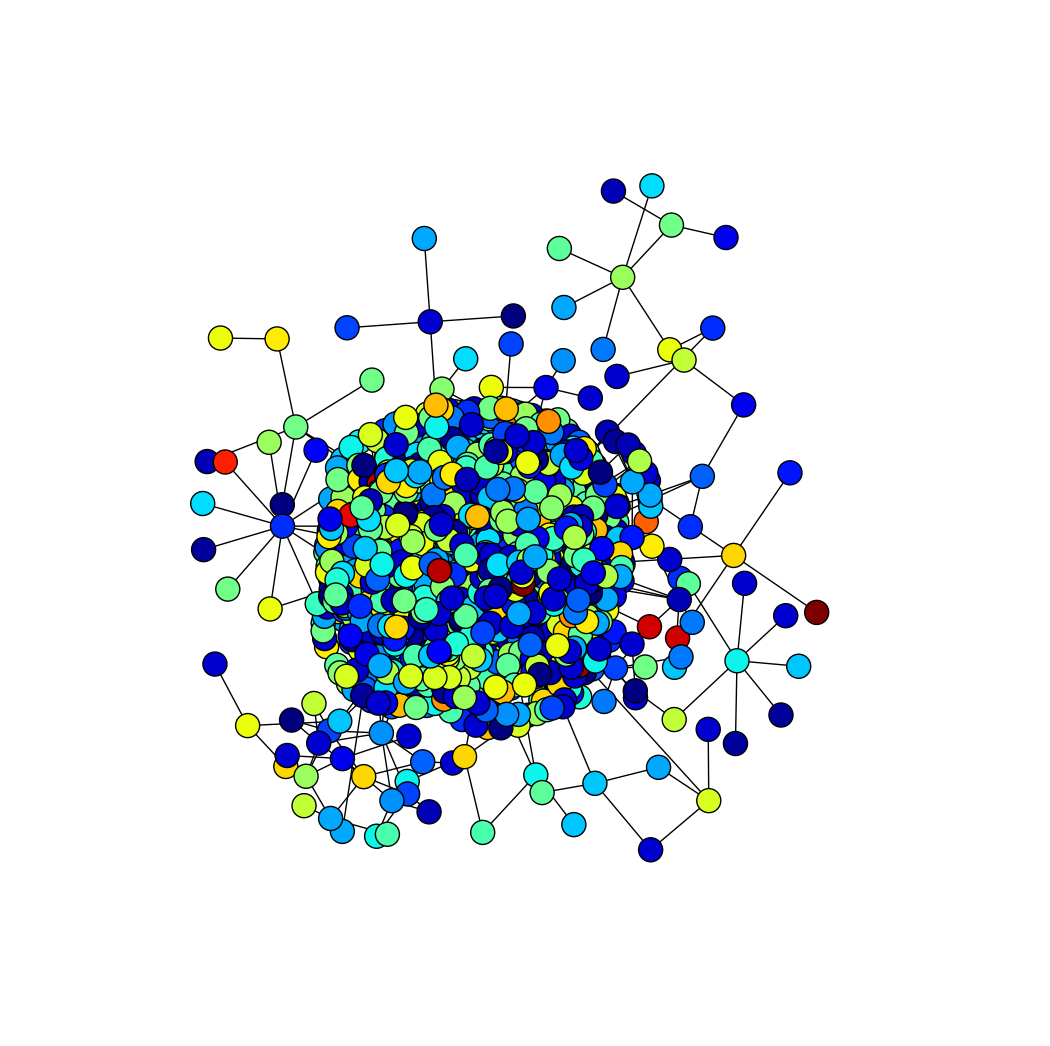

In [117]:
G=nx.Graph()
G.add_edges_from(list_edges)
G_prime = nx.subgraph(G, list(next(nx.connected_components(G))))
test(G_prime)

[{u'arimaes', u'kate'},
 {u'missyingmisswu',
  u'coach',
  u'sundaze_pei',
  u'poon_ka_nei',
  u'xanderzhou',
  u'itsmeagatao',
  u'nikesportswear',
  u'kamiidea',
  u'slayerespresso',
  u'galerieslafayettedubai',
  u'sams_77',
  u'julianameninaetc',
  u'herman02020202',
  u'gilisswimwear',
  u'pinkanoushka',
  u'msk_732',
  u'mariekate1317',
  u'_halaluka_',
  u'urbandecaycosmetics',
  u'printempsofficial',
  u'sarajensens',
  u'architizer',
  u'aiday_issayeva',
  u'mareenbayer',
  u'balenciaga',
  u'loeildemassena',
  u'aarab.lina96',
  u'travelingaroundthew6rld',
  u'cilia_beauty',
  u'nozha_hnid',
  u's_____a_85',
  u'lesliesima',
  u'lucindareadsandwrites',
  u'chantalthomass',
  u'cheekyhalcyon',
  u'bc.vue',
  u'_alejacastello',
  u'sukhemuziicaldoctorz',
  u'marinaanesta',
  u'griya',
  u'compakgrinders',
  u'beckylandrock',
  u'ledoyenangelyne',
  u'diormakeup',
  u'franck_langard',
  u'ateliercologne',
  u'j.ennniferr',
  u'vintageimagebox',
  u'lorenzo_cerchi',
  u'louandrea

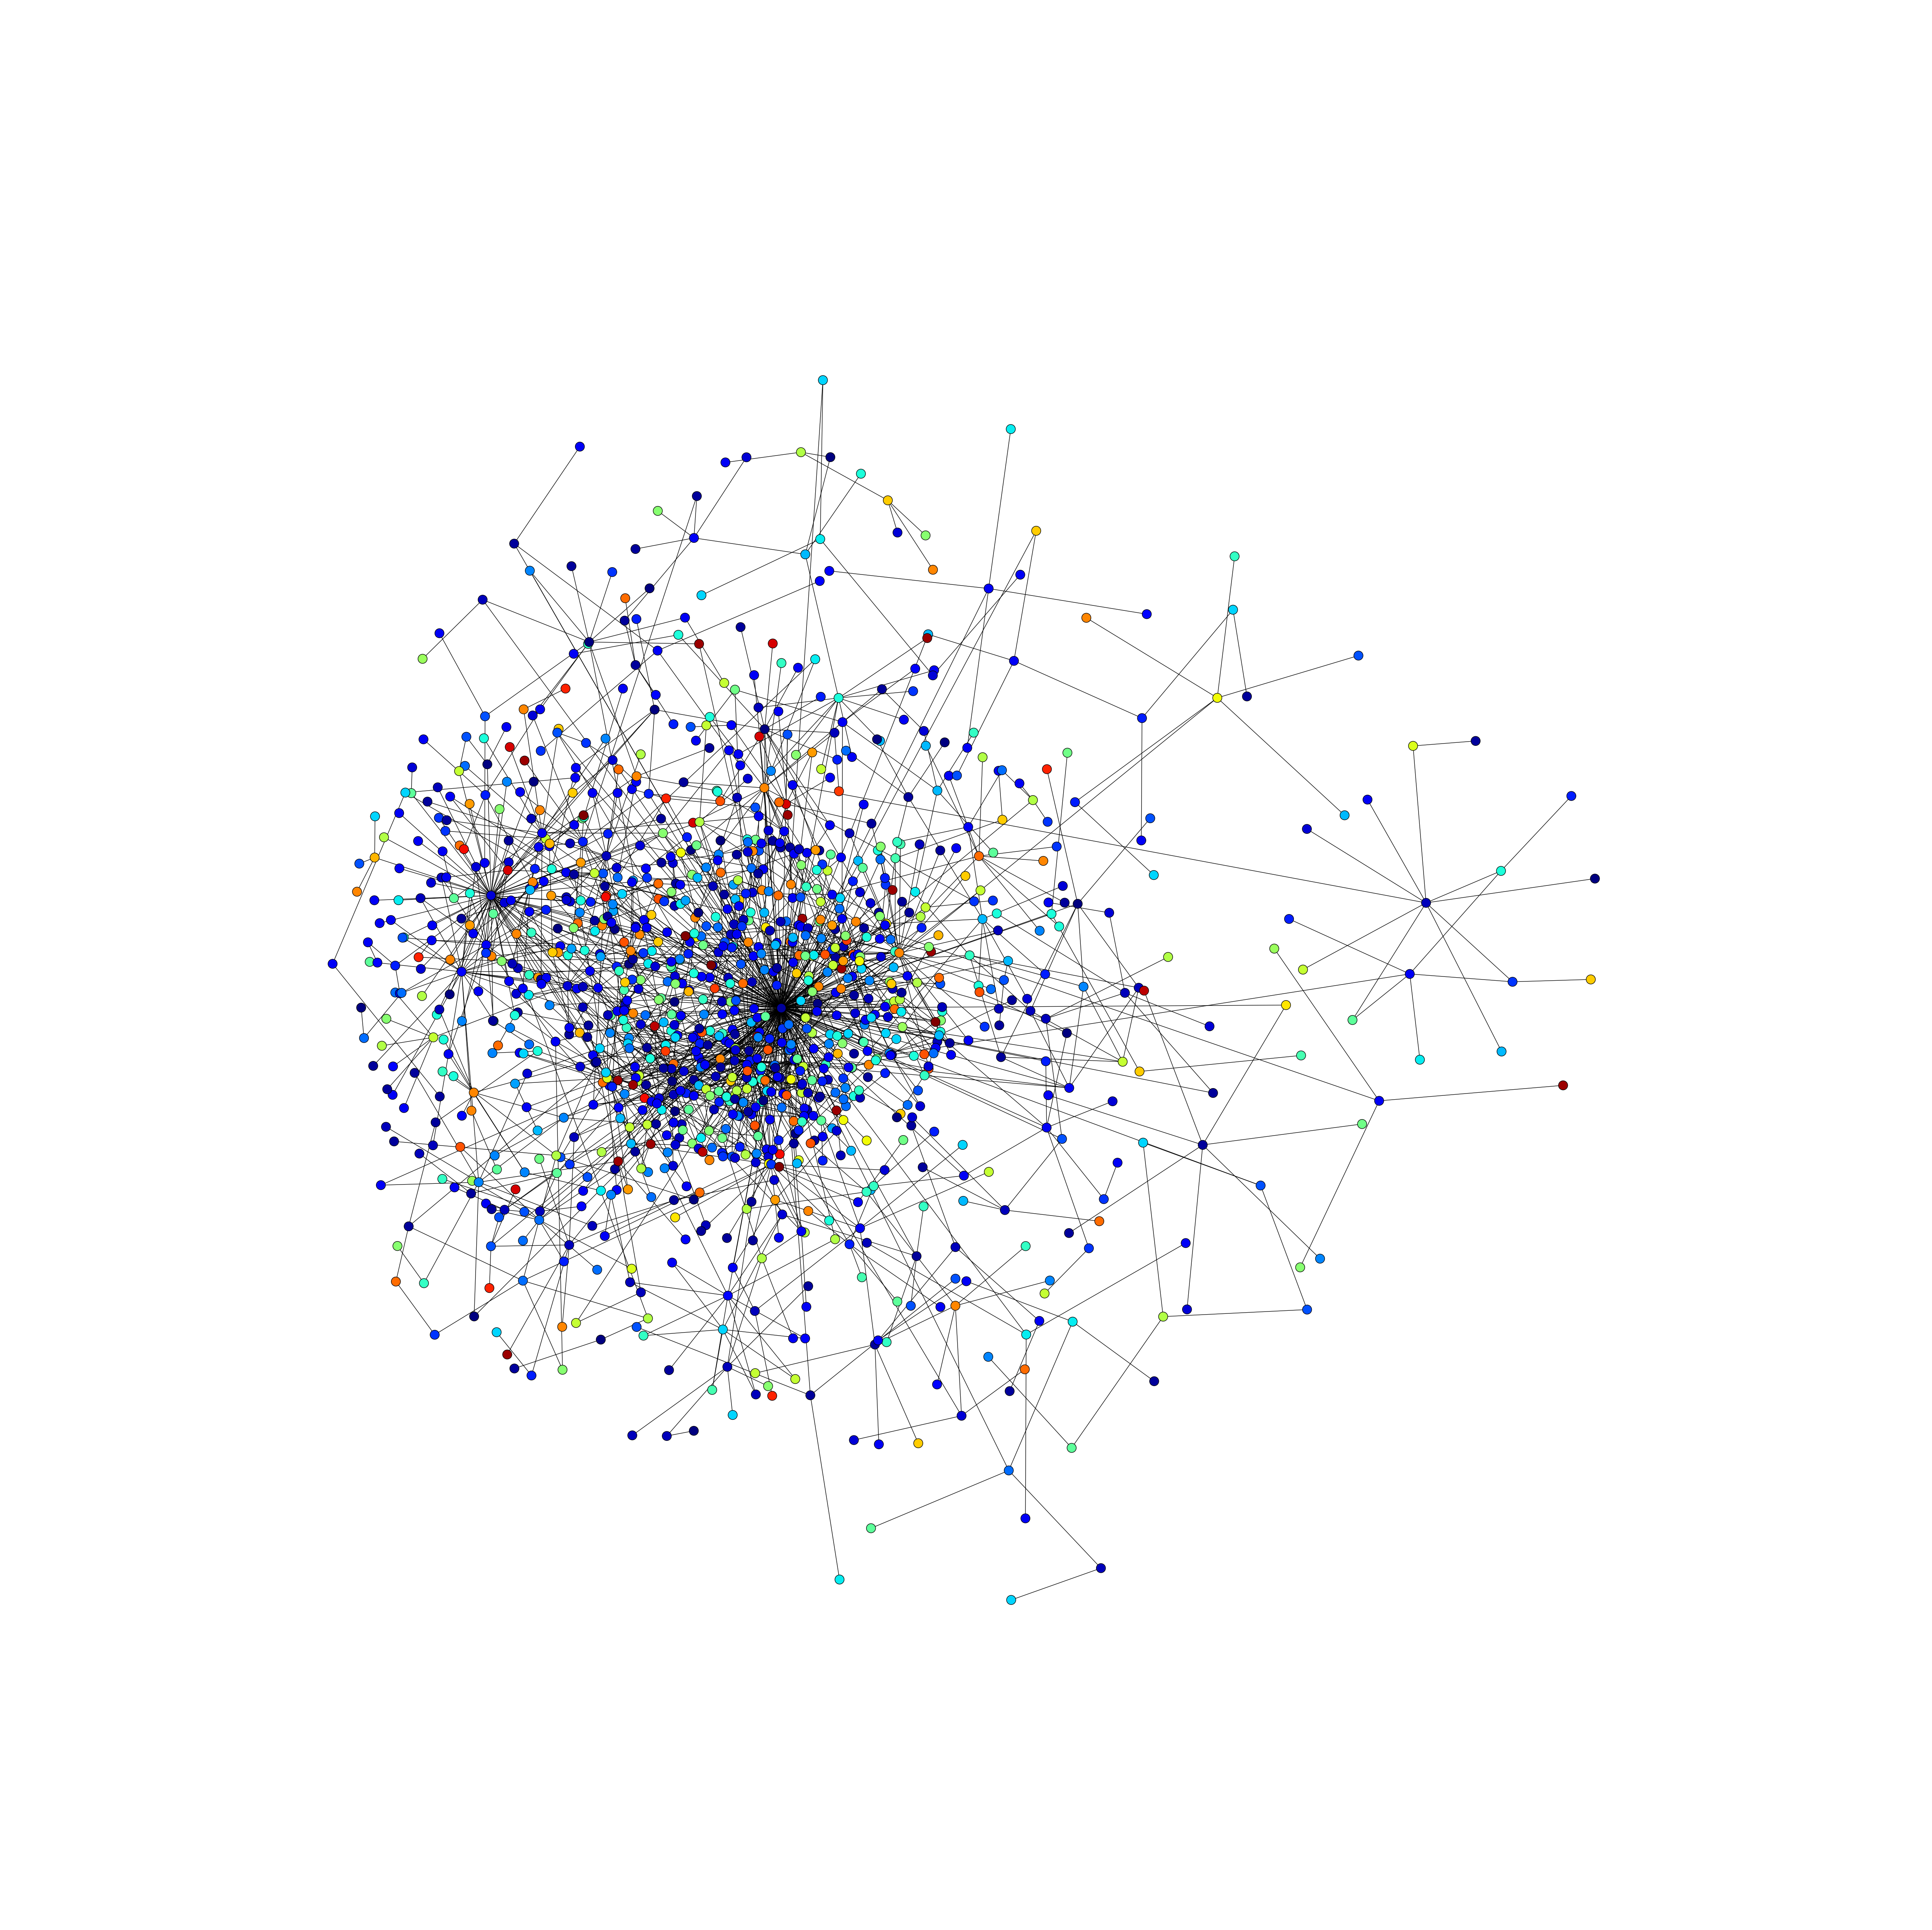

In [123]:
G_march=nx.Graph()
G_march.add_edges_from(list_edges_march)
G_prime_march = nx.subgraph(G_march, list(nx.connected_components(G_march))[1])
test(G_prime_march, [50,50])

In [125]:
pd.read_csv("test_instagram.csv", encoding="utf-8")

Unnamed: 0 node.comments_disabled  node.dimensions.height  \
0              0                  False                   750.0   
1              0                  False                   937.0   
2              0                  False                  1350.0   
3              0                  False                  1080.0   
4              0                  False                   750.0   
5              0                  False                   750.0   
6              0                  False                   480.0   
7              0                  False                  1080.0   
8              0                  False                   612.0   
9              0                  False                   750.0   
10             0                  False                  1350.0   
11             0                  False                  1080.0   
12             0                  False                   750.0   
13             0                  False                  1350.0   
14             0                  False                  1080.0   
15             0                  False                   750.0   
16             0                  False                   857.0   
17             0                  False                  1080.0   
18             0                  False                   750.0   
19             0                  False                  1350.0   
20             0                  False                   810.0   
21             0                  False                  1080.0   
22             0                  False                   937.0   
23             0                  False                  1080.0   
24             0                  False                  1080.0   
25             0                  False                   810.0   
26             0                  False                  1080.0   
27             0                  False                  1350.0   
28             0                  False                  1350.0   
29             0                  False                   720.0   
...          ...                    ...                     ...   
22394          0                  False                  1350.0   
22395          0                  False                  1080.0   
22396          0                  False                  1080.0   
22397          0                  False                  1350.0   
22398          0                  False                  1080.0   
22399          0                  False                  1350.0   
22400          0                  False                   810.0   
22401          0                  False                  1080.0   
22402          0                  False                  1350.0   
22403          0                  False                   421.0   
22404          0                  False                   750.0   
22405          0                  False                  1350.0   
22406          0                  False                   606.0   
22407          0                  False                  1350.0   
22408          0                  False                  1080.0   
22409          0                  False                   873.0   
22410          0                  False                  1350.0   
22411          0                  False                  1080.0   
22412          0                  False                   937.0   
22413          0                  False                  1080.0   
22414          0                  False                  1350.0   
22415          0                  False                  1350.0   
22416          0                  False                   810.0   
22417          0                  False                  1080.0   
22418          0                  False                  1080.0   
22419          0                  False                   937.0   
22420          0                  False                  1350.0   
22421          0                  False              

In [141]:
for con in nx.connected_components(G):
    print con

set([u'arimaes', u'trztn', u'ututulja', u'daphne_parrelli', u'xanderzhou', u'julienmni13', u'veronewline', u'siamhousethai', u'sams_77', u'kay_hurricane', u'msgm', u'itsdjam', u'mirella.jonckers', u'bellomag', u'erinmaree173', u'urbandecaycosmetics', u'maviedebrunette', u'karlgaspar', u'architizer', u'just__peinado', u'paris', u'emiliee_ph', u'mareenbayer', u'jadoushkaa', u'waltervanbeirendonck', u's_____a_85', u'macierierab1961', u'yann_delacour', u'got2beee', u'abri', u'votumofficial', u'biggy_tanarak', u'tnm.ddl', u'coco_kiri', u'j.ennniferr', u'lillian_aurora', u'mylittleparis', u'federica__ferrara', u'rosemcgowan', u'koko_matthews', u'parsy_mathilde', u'raico_eu', u'strasbourg_eurometropole', u'theprettyusmu', u'dung_helena', u'khunkatekate', u'reebokcrossfitlouvre', u'lilymoon_on_the_move', u'i_k_kw', u'dylouilletrn', u'vincentmorla', u'redcardtokyo', u'marina.ef_', u'cilcee', u'uniquelyoctaviarosyadi', u'JimmyChoo', u'stellaluciadeopito', u'lienyeung', u'justinedschmp', u'amalta

In [142]:
sorted([(a,b) for a,b in zip(G.to_directed().in_degree().keys(),G.to_directed().in_degree().values())], key=lambda x: x[1], reverse=True)

[(u'galerieslafayette', 693),
 (u'ghetto__luxury', 139),
 (u'lafayettejkt', 102),
 (u'lafayetteanticipations', 83),
 (u'galerieslafayetteistanbul', 81),
 (u'sami_makeup_luxembourg', 77),
 (u'victoriabonya', 76),
 (u'annetch', 71),
 (u'mirgaeva_galinka', 56),
 (u'galerieslafayetteberlin', 45),
 (u'lifejoy88', 43),
 (u'GaleriesLafayette', 43),
 (u'_viktoriya_14', 40),
 (u'carosupernova', 39),
 (u'la_compagnie_des_hommes', 37),
 (u'd_angelann', 37),
 (u'shopping_milan_paris', 32),
 (u'bkb_nerga', 32),
 (u'aiday_issayeva', 29),
 (u'ulianaberdysheva', 29),
 (u'oliviasabbah', 28),
 (u'lvglparis.news.lila', 27),
 (u'ginzafashion', 27),
 (u'liberation', 26),
 (u'susu_lauder_paris', 26),
 (u'guerlain', 25),
 (u'paris', 24),
 (u'liberationparis', 24),
 (u'yanncouvreur', 24),
 (u'angelann_dubai_mall', 24),
 (u'mabichesurletoit', 24),
 (u'biannjewelry', 24),
 (u'baoba_comunicacao', 24),
 (u'get_repost', 24),
 (u'artstudyo75', 23),
 (u'pacificplacejkt', 23),
 (u'katrin_karkach_', 23),
 (u'papyvroum

In [7]:
%pylab inline

/Users/thedoctor/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


/Users/thedoctor/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['add']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [20]:
import igraph

In [34]:
list_users = list(set([a for l in [[a,b] for a,b in list_edges] for a in l]))

In [47]:
G = igraph.Graph()
G.add_vertices(list_users)
G.add_edges(list_edges)
G = G.simplify()

In [50]:
G_prime = G.clusters().giant()

In [71]:
cl = G_prime.community_fastgreedy()
k=5
list_clust = cl.as_clustering(k).membership

In [72]:
([(vertex.attributes()["name"], cluster) for vertex, cluster in zip(G_prime.vs, list_clust)])

[(u'arimaes', 0),
 (u'trztn', 0),
 (u'ututulja', 1),
 (u'alhadithyphotography', 0),
 (u'xanderzhou', 2),
 (u'julienmni13', 2),
 (u'veronewline', 3),
 (u'siamhousethai', 0),
 (u'sams_77', 4),
 (u'kay_hurricane', 1),
 (u'msgm', 4),
 (u'itsdjam', 2),
 (u'bellomag', 3),
 (u'urbandecaycosmetics', 0),
 (u'maviedebrunette', 2),
 (u'architizer', 0),
 (u'just__peinado', 2),
 (u'paris', 0),
 (u'emiliee_ph', 3),
 (u'mareenbayer', 3),
 (u'jadoushkaa', 1),
 (u'wanderkraehe', 0),
 (u'yann_delacour', 0),
 (u'got2beee', 2),
 (u'abri', 0),
 (u'laura_dinares', 0),
 (u'biggy_tanarak', 4),
 (u'tnm.ddl', 0),
 (u'votumofficial', 2),
 (u'j.ennniferr', 4),
 (u'ayanna_39', 1),
 (u'lillian_aurora', 0),
 (u'mylittleparis', 0),
 (u'federica__ferrara', 4),
 (u'rosemcgowan', 3),
 (u'strplife', 0),
 (u'parsy_mathilde', 2),
 (u'galerieslafayettefr', 2),
 (u'raico_eu', 0),
 (u'strasbourg_eurometropole', 3),
 (u'bw_style', 1),
 (u'theprettyusmu', 2),
 (u'dung_helena', 2),
 (u'khunkatekate', 0),
 (u'reebokcrossfitlouvre

In [80]:
import random
random.seed(1)

comms = G_prime.community_multilevel()


igraph.plot(G_prime)

TypeError: plotting not available

In [15]:
G_prime = nx.subgraph(G, list(next(nx.connected_components(G))))
G_prime_d = G_prime.to_directed()

In [ ]:
G_prime.

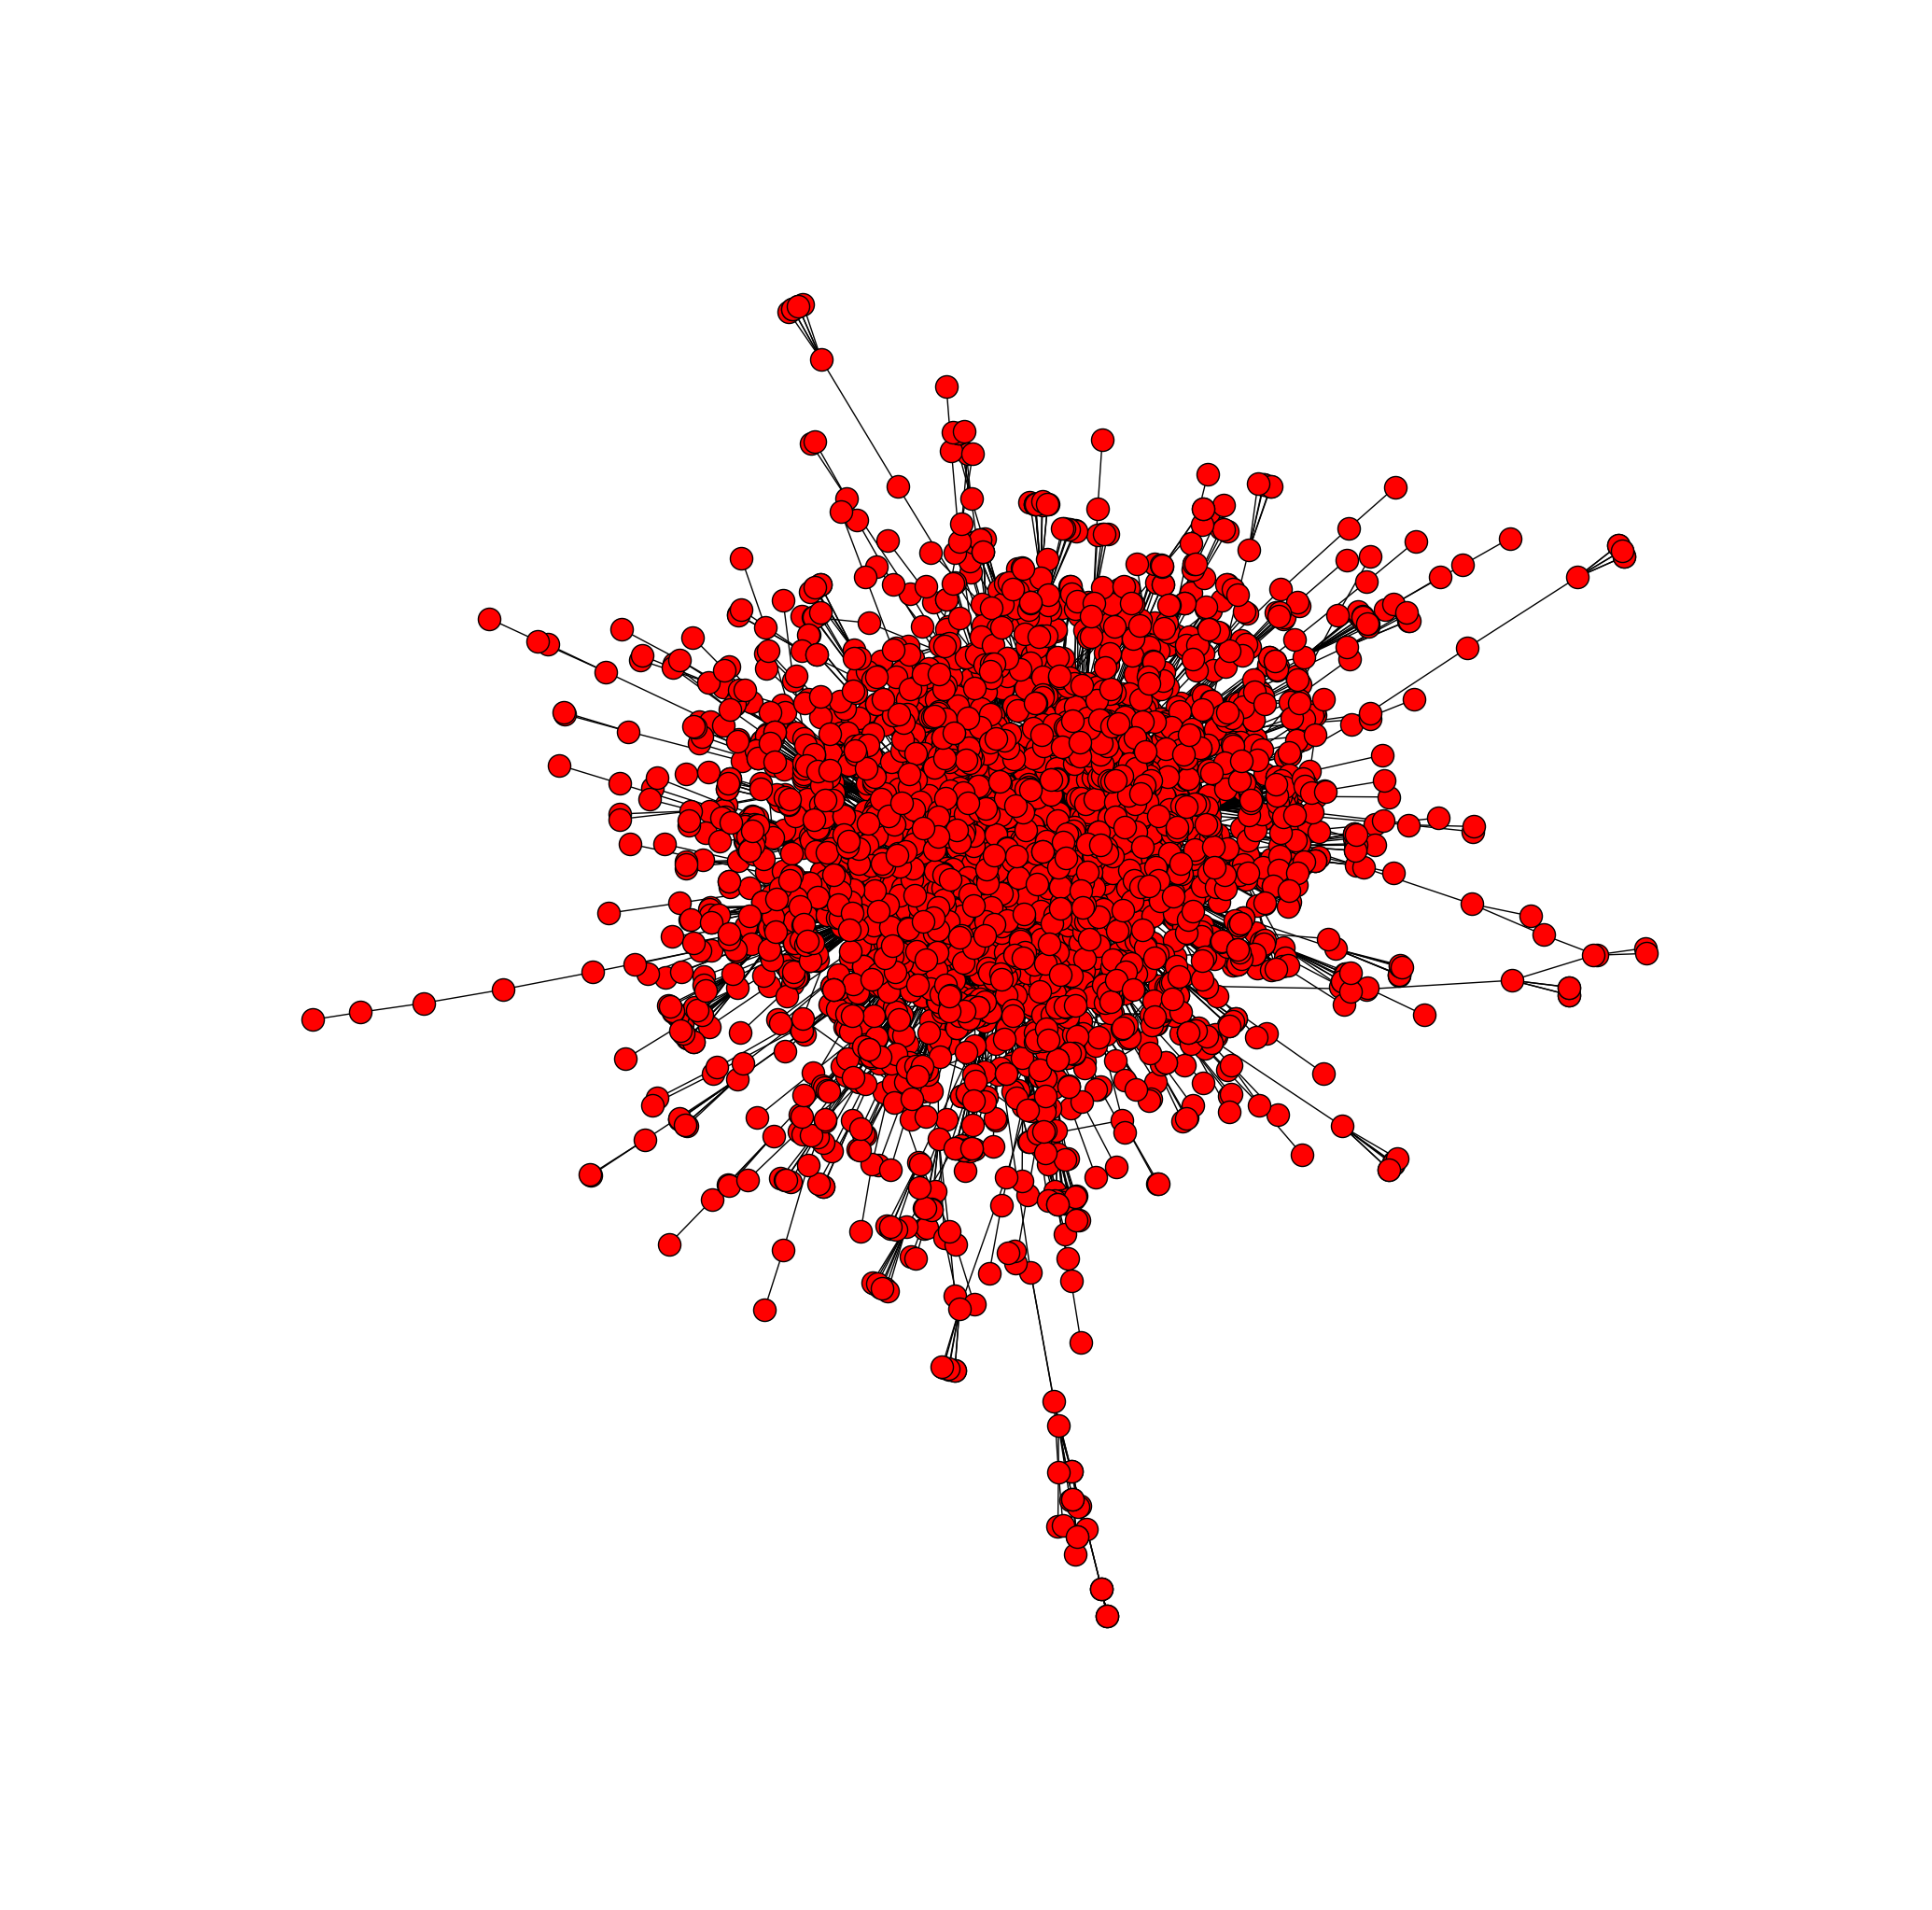

In [144]:
import matplotlib.pyplot as plt

plt.figure(figsize=[20,20])
nx.draw(G_prime, pos=nx.spring_layout(G_prime))


In [133]:
nx.hits_numpy(G)

/Users/thedoctor/anaconda/lib/python2.7/site-packages/networkx/algorithms/link_analysis/hits_alg.py:198: ComplexWarning: Casting complex values to real discards the imaginary part
  hubs=dict(zip(G.nodes(),map(float,h)))
/Users/thedoctor/anaconda/lib/python2.7/site-packages/networkx/algorithms/link_analysis/hits_alg.py:199: ComplexWarning: Casting complex values to real discards the imaginary part
  authorities=dict(zip(G.nodes(),map(float,a)))


({u'roberts': 9.946446526926919e-06,
  u'arimaes': 8.14290352073273e-06,
  u'trztn': 0.00015319933906039109,
  u'ututulja': 8.25901467252992e-06,
  u'alhadithyphotography': 3.6224580036342157e-07,
  u'xanderzhou': 4.833215884341587e-05,
  u'julienmni13': 5.538035349176569e-05,
  u'superga_id': 6.196688602902173e-05,
  u'chaos': 0.00026324351427260424,
  u'siamhousethai': 1.0839715110666794e-05,
  u'sams_77': 3.1750681339366716e-07,
  u'kay_hurricane': 0.0012425055725929298,
  u'msgm': 5.985145089218338e-05,
  u'sonyya.soniia': 5.462398625032677e-05,
  u'bellomag': 6.544417696284342e-27,
  u'tanjaic_': 6.396440135163704e-28,
  u'urbandecaycosmetics': 6.721336708414446e-05,
  u'maviedebrunette': 6.2525428735076555e-06,
  u'sarajensens': 0.0,
  u'architizer': 2.384098391816846e-06,
  u'mrjmbailey': 0.0,
  u'just__peinado': 0.00011060080046541375,
  u'paris': 0.0007771428510232633,
  u'emiliee_ph': 0.0001526312642294958,
  u'mareenbayer': 0.001438788644866763,
  u'jadoushkaa': 3.7856783848

In [145]:
result = nx.in_degree_centrality(G.to_directed())

In [146]:
sorted([(a,b) for a,b in zip(result.keys(),result.values())],key=lambda x: x[1], reverse=True)

[(u'galerieslafayette', 0.15365853658536585),
 (u'ghetto__luxury', 0.03082039911308204),
 (u'lafayettejkt', 0.02261640798226164),
 (u'lafayetteanticipations', 0.018403547671840353),
 (u'galerieslafayetteistanbul', 0.01796008869179601),
 (u'sami_makeup_luxembourg', 0.01707317073170732),
 (u'victoriabonya', 0.016851441241685146),
 (u'annetch', 0.01574279379157428),
 (u'mirgaeva_galinka', 0.012416851441241685),
 (u'galerieslafayetteberlin', 0.009977827050997782),
 (u'lifejoy88', 0.009534368070953437),
 (u'GaleriesLafayette', 0.009534368070953437),
 (u'_viktoriya_14', 0.008869179600886918),
 (u'carosupernova', 0.008647450110864745),
 (u'la_compagnie_des_hommes', 0.008203991130820399),
 (u'd_angelann', 0.008203991130820399),
 (u'shopping_milan_paris', 0.007095343680709534),
 (u'bkb_nerga', 0.007095343680709534),
 (u'aiday_issayeva', 0.006430155210643015),
 (u'ulianaberdysheva', 0.006430155210643015),
 (u'oliviasabbah', 0.006208425720620843),
 (u'lvglparis.news.lila', 0.00598669623059867),
 

In [147]:
import datetime

pd.to_datetime(1000000000*df["node.taken_at_timestamp"])

0       2018-04-11 20:49:13
1       2018-04-11 20:41:35
2       2018-04-11 20:37:43
3       2018-04-11 20:35:06
4       2018-04-11 20:34:29
5       2018-04-11 20:26:29
6       2018-04-11 20:26:12
7       2018-04-11 20:24:56
8       2018-04-11 20:24:04
9       2018-04-11 20:23:58
10      2018-04-11 20:22:20
11      2018-04-11 20:18:11
12      2018-04-11 20:15:47
13      2018-04-11 20:12:05
14      2018-04-11 20:08:10
15      2018-04-11 20:05:18
16      2018-04-11 20:01:31
17      2018-04-11 20:00:29
18      2018-04-11 19:59:07
19      2018-04-11 19:55:55
20      2018-04-11 19:55:14
21      2018-04-11 19:54:13
22      2018-04-11 19:50:26
23      2018-04-11 19:50:20
24      2018-04-11 19:49:05
25      2018-04-11 19:48:13
26      2018-04-11 19:47:05
27      2018-04-11 19:41:50
28      2018-04-11 19:40:53
29      2018-04-11 19:40:50
                ...        
14045   2018-01-06 17:09:38
14046   2018-01-06 17:07:09
14047   2018-01-06 17:06:43
14048   2018-01-06 17:05:59
14049   2018-01-06 1

In [149]:
df["node.id"].value_counts()

1740768234498268233    1
1720443460883278939    1
1691993356954906420    1
1704997646585207923    1
1732671678713916546    1
1745876230412410831    1
1732716136161673031    1
1749412723848162338    1
1747270873445649563    1
1712504343020697499    1
1752664218179336225    1
1731425098285607993    1
1724048397853120412    1
1715556034531231432    1
1743032231163049028    1
1709742888111105594    1
1723178650668110296    1
1735575958724858815    1
1628889544178082644    1
1717679410678990083    1
1694968922662485385    1
1726468761190729790    1
1696734687979340421    1
1701070157017198744    1
1729926872059451883    1
1747859124680604706    1
1693376312139147577    1
1737738970718174033    1
1712830771691989539    1
1706163746169639447    1
                      ..
1741367194095617939    1
1739374961973185963    1
1739692648874270043    1
1748751341784489963    1
1742868135301962415    1
1752340383708337641    1
1729708726107327680    1
1741012179798525615    1
1685689361982549819    1
